#Exercise 1 - Predicting Wine Quality using MLP.

#Part 1: Data Preparation:

#1.1 Load and Explore the Dataset:

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#my code
from sklearn.datasets import load_wine


In [4]:
# Load wine dataset
wine = load_wine()

# Converting to pandas DataFrame
dataset_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
dataset_wine["target"] = wine.target

# Display basic information
print("Dataset shape:", dataset_wine.shape)
print("\nFirst 5 rows:")
dataset_wine.head()


Dataset shape: (178, 14)

First 5 rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#Answers :

#Q1. How many samples and features?

Samples: 178

Features: 13

#Q2. Wine classes and distribution?

In [5]:
for i, name in enumerate(wine.target_names):
    print(name, ":", sum(wine.target == i))


class_0 : 59
class_1 : 71
class_2 : 48


#Q4. Missing values?

#-> No missing values

In [6]:
dataset_wine.isnull().sum().sum()


np.int64(0)

#Q4. Wine class names?

In [7]:
wine.target_names


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#Task 1.2: Data Splitting and Scaling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [9]:
# Separate features and target
X = wine.data
y = wine.target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (142, 13)
Testing set shape: (36, 13)


#Answers

#Q5. Why split before scaling?
#-> To avoid using test data information during training.

#Q6. Why fit scaler only on training data?
#-> To prevent data leakage.

#Q7. Purpose of random_state?
#-> To get the same results every time.

#Q8. What do mean and scale represent?

#mean -> average of each feature

#scale -> standard deviation of each feature

#**PART 2 – MODEL DEFINITION AND TRAINING**

#Task 2.1: Create MLP Model

In [10]:
from sklearn.neural_network import MLPClassifier


In [11]:
# CreatING MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

print("Hidden layers:", mlp.hidden_layer_sizes)
print("Activation:", mlp.activation)
print("Solver:", mlp.solver)
print("Max iterations:", mlp.max_iter)


Hidden layers: (50, 25)
Activation: relu
Solver: adam
Max iterations: 500


#Task 2.2: Train the Model

In [12]:
# TrainING the model
mlp.fit(X_train_scaled, y_train)

print("Training iterations:", mlp.n_iter_)
print("Training loss:", mlp.loss_)
print("Training accuracy:", mlp.score(X_train_scaled, y_train))


Training iterations: 195
Training loss: 0.006756784568725263
Training accuracy: 1.0


#Q9. What does loss mean?
#->It shows how wrong the model predictions are.

#Q10. Iterations taken?
#->Shown by mlp.n_iter_

#Q11. What if loss is high?
#->Model is not learning well.

#Q12. Training accuracy?
#->Shown above.print("Training accuracy:", mlp.score(X_train_scaled, y_train)) ->Training accuracy: 1.0

#**PART 3 – MODEL EVALUATION**

#Task 3.1: Predictions and Accuracy

In [13]:
from sklearn.metrics import accuracy_score


In [14]:
# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0


#Task 3.2: Detailed Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [16]:
# Classification report
print(classification_report(y_test, y_pred, target_names=wine.target_names))


              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



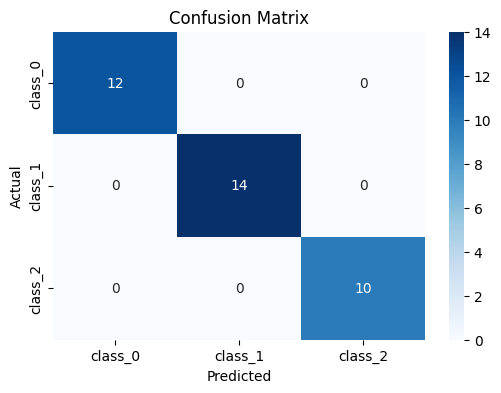

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


#Q13. Best & worst class?
#->Based on highest and lowest F1-score.

#Q14. Precision, Recall, F1 per class?
#->Shown in classification report.

#Q15. Errors from confusion matrix?
#->Some classes are confused with similar wine types.

#Q16. Class imbalance?
#->No major imbalance.